# IPCV Experiment-9

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("hogwarts.jpg", cv2.IMREAD_COLOR)
# cv2.imshow("Displayed Image",image)

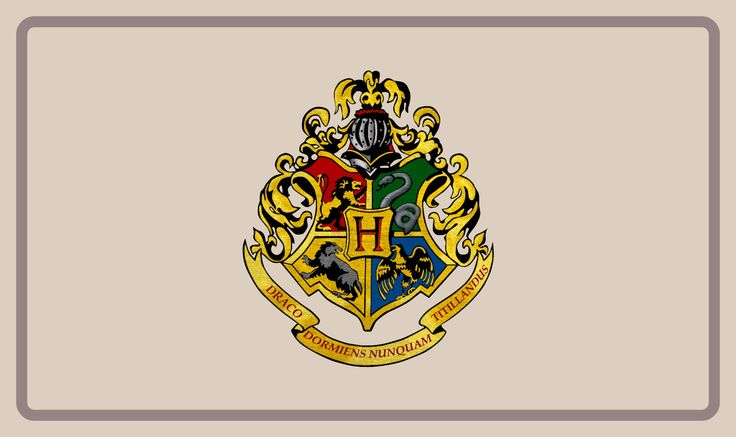

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
print("Size of image: ",image.shape)
print("Datatype of image: ",image.dtype)
print("Channels of image: ",image.ndim)
print("Total number of pixels (Size of image):",image.size)

Size of image:  (437, 736, 3)
Datatype of image:  uint8
Channels of image:  3
Total number of pixels (Size of image): 964896


#### Translation

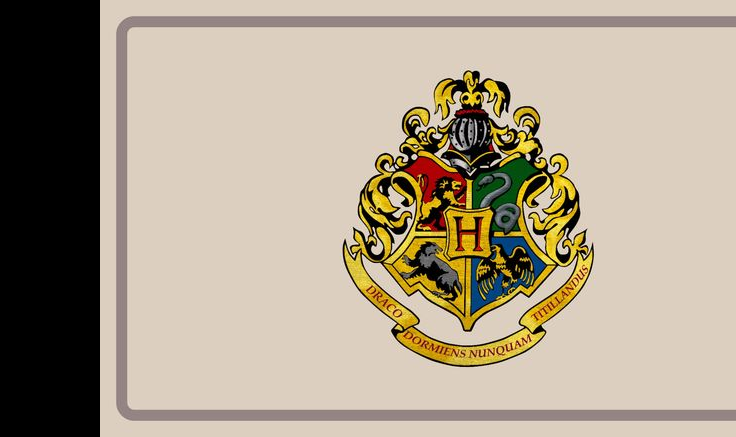

In [ ]:
# Translate in x direction
translation_matrix_x = np.float32([[1, 0, 100], [0, 1, 0]])
translated_image_x = cv2.warpAffine(image, translation_matrix_x, (cols, rows))
cv2_imshow(translated_image_x)

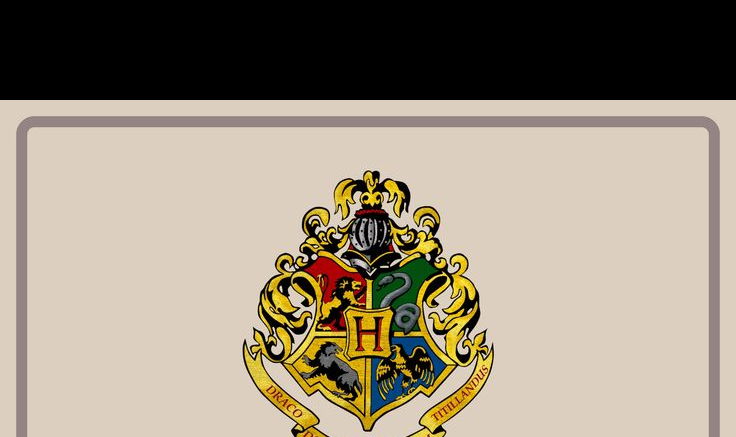

In [ ]:
# Translate in y direction
translation_matrix_y = np.float32([[1, 0, 0], [0, 1, 100]])
translated_image_y = cv2.warpAffine(image, translation_matrix_y, (cols, rows))
cv2_imshow(translated_image_y)

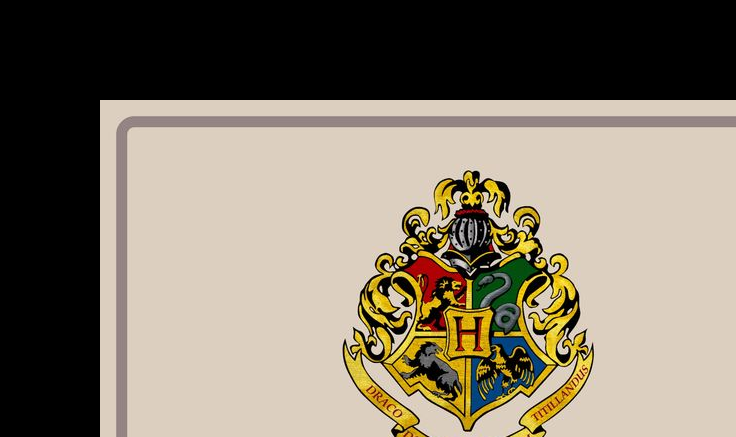

In [ ]:
# Translate in both direction
translation_matrix_xy = np.float32([[1, 0, 100], [0, 1, 100]])
translated_image_xy = cv2.warpAffine(image, translation_matrix_xy, (cols, rows))
cv2_imshow(translated_image_xy)

#### Reflection

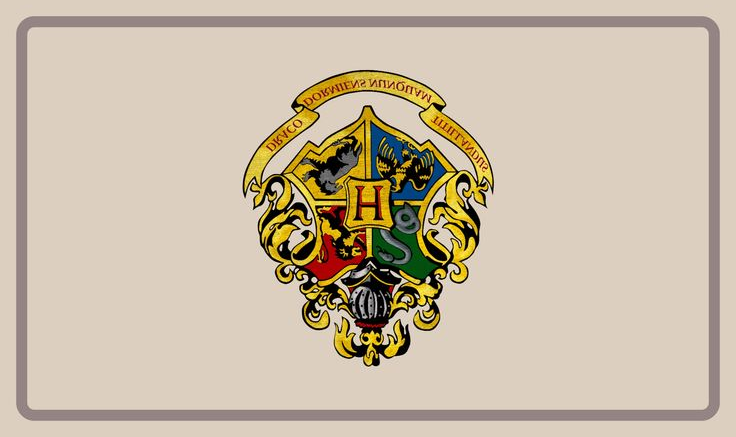

In [ ]:
# Reflect across horizontal axis
reflected_horizontal = cv2.flip(image, 0)
cv2_imshow(reflected_horizontal)

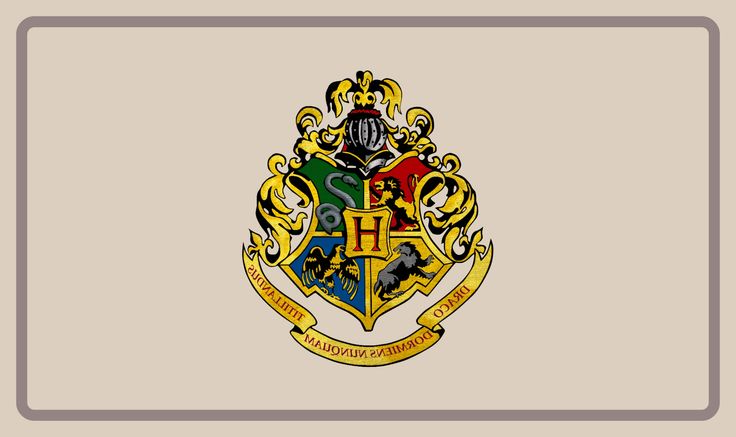

In [ ]:
# Reflect across vertical axis
reflected_vertical = cv2.flip(image, 1)
cv2_imshow(reflected_vertical)

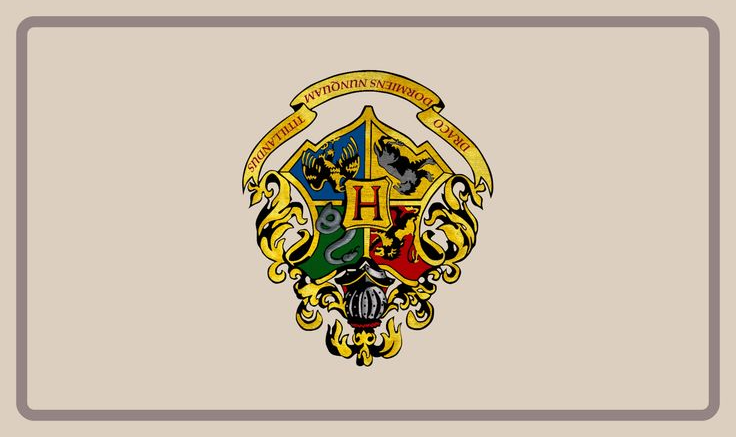

In [ ]:
# Reflect across both axes
reflected_both = cv2.flip(image, -1)
cv2_imshow(reflected_both)

#### Rotation

Rotated by 45 degrees:


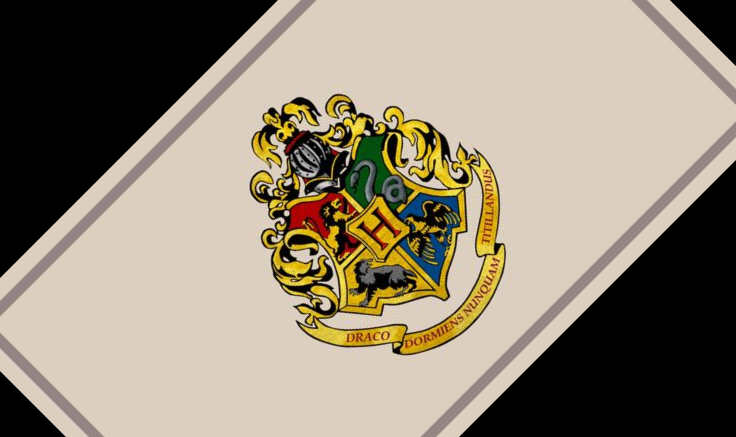


Rotated by -45 degrees:


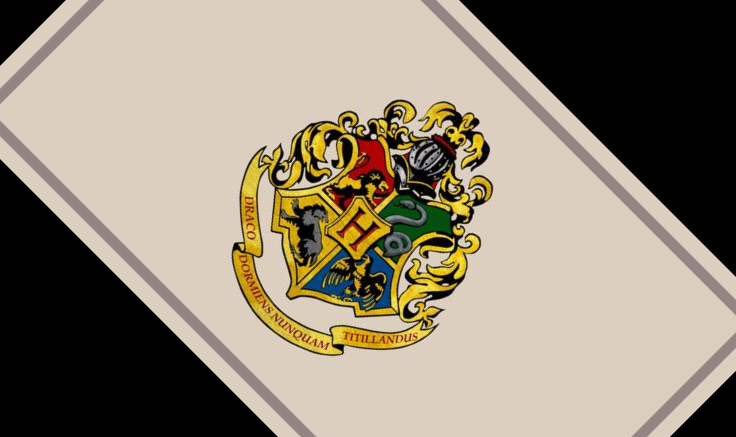


Rotated by 90 degrees:


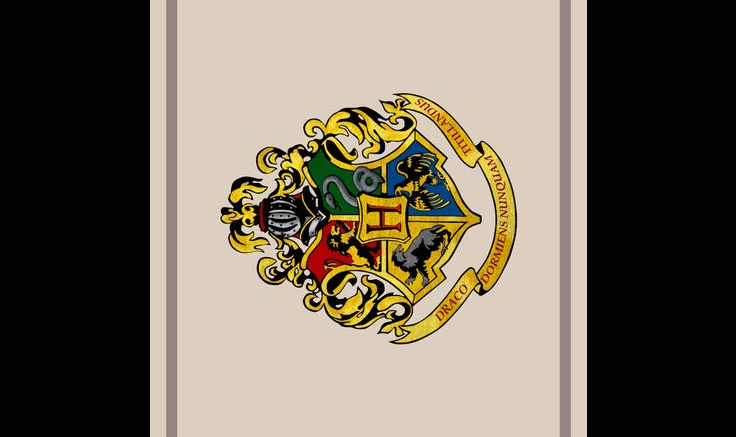


Rotated by -90 degrees:


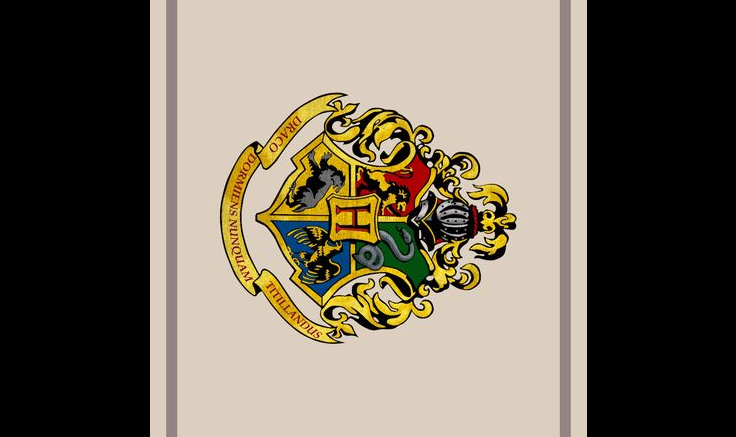

In [ ]:
angles = [45, -45, 90, -90]

(h, w) = image.shape[:2]
center = (w // 2, h // 2)

for angle in angles:
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

  rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

  print(f"Rotated by {angle} degrees:")
  cv2_imshow(rotated_image)
  print()

#### Scaling

Scaled by factor 0.5:


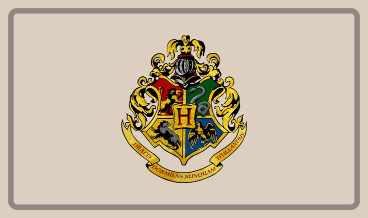


Scaled by factor 1:


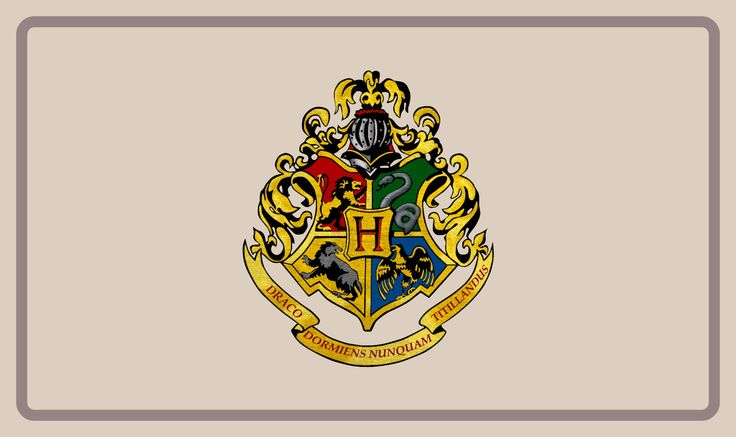


Scaled by factor 1.5:


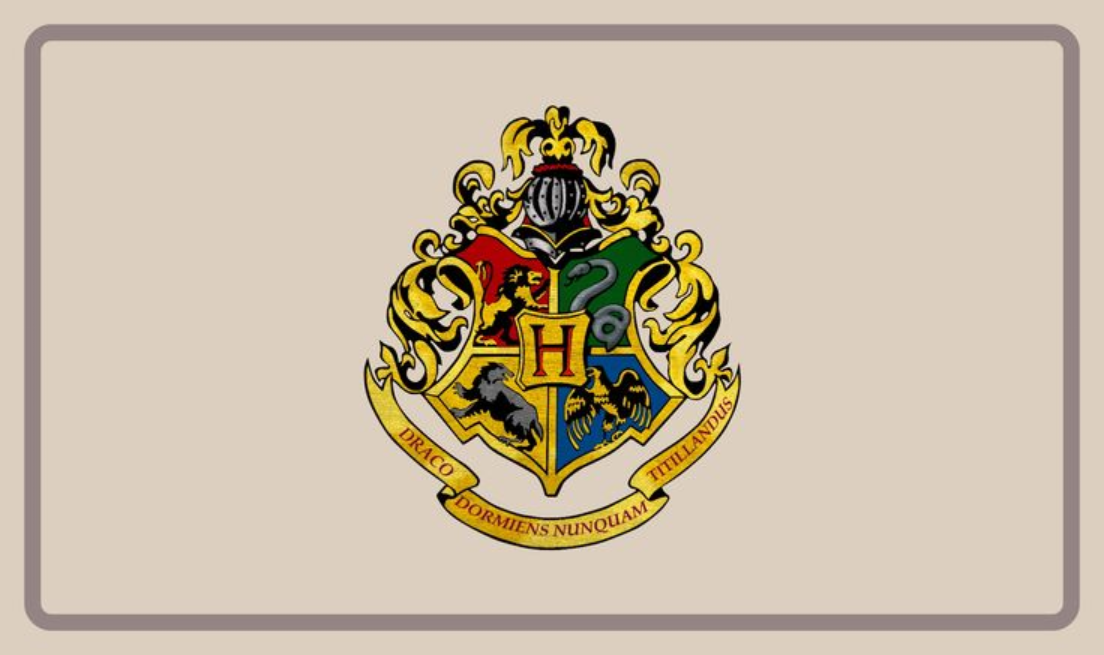

In [ ]:
scaling_factors = [0.5, 1, 1.5]

h, w = image.shape[:2]

for scale in scaling_factors:
    new_w = int(w * scale)
    new_h = int(h * scale)

    scaled_image = cv2.resize(image, (new_w, new_h))

    print(f"Scaled by factor {scale}:")
    cv2_imshow(scaled_image)
    print()

#### Shearing

Sheared along x-axis:


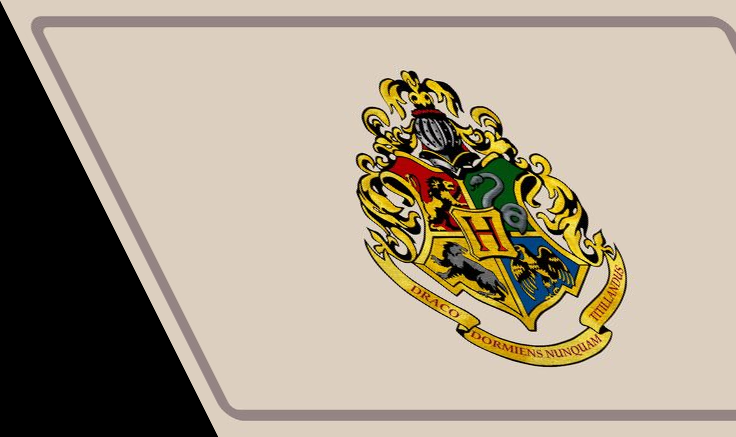

In [ ]:
# Shearing along the x-axis
shear_factor_x = 0.5
shear_matrix_x = np.float32([[1, shear_factor_x, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, shear_matrix_x, (w, h))
print("Sheared along x-axis:")
cv2_imshow(sheared_image_x)
print()

Sheared along y-axis:


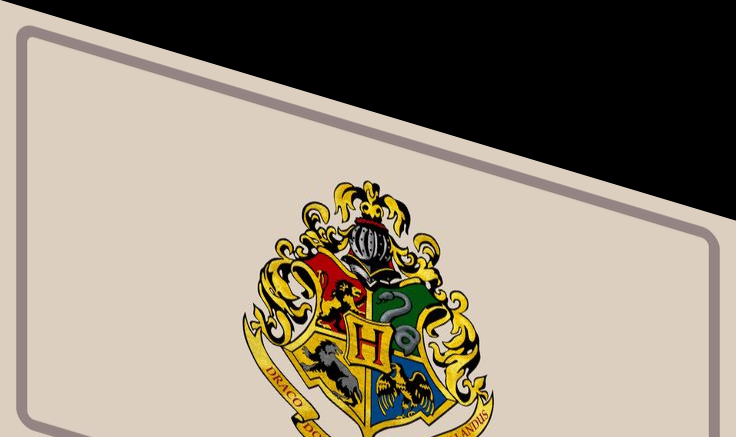

In [ ]:
# Shearing along the y-axis
shear_factor_y = 0.3
shear_matrix_y = np.float32([[1, 0, 0], [shear_factor_y, 1, 0]])
sheared_image_y = cv2.warpAffine(image, shear_matrix_y, (w, h))
print("Sheared along y-axis:")
cv2_imshow(sheared_image_y)
print()

Sheared along both axes:


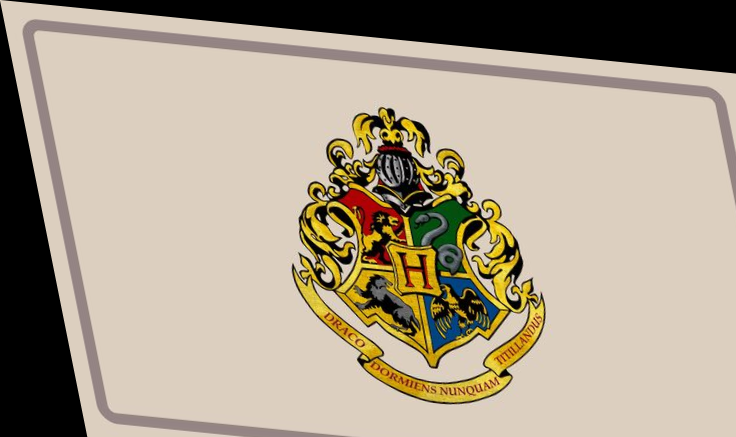

In [ ]:
# Shearing along both axes
shear_factor_x_both = 0.2
shear_factor_y_both = 0.1
shear_matrix_both = np.float32([[1, shear_factor_x_both, 0], [shear_factor_y_both, 1, 0]])
sheared_image_both = cv2.warpAffine(image, shear_matrix_both, (w, h))
print("Sheared along both axes:")
cv2_imshow(sheared_image_both)

#### Combination of Transformations

Translation -> Rotation:


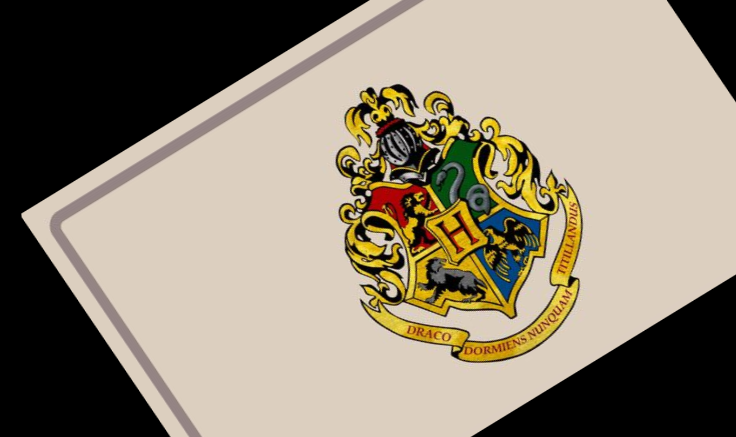

In [ ]:
# Translation + Rotation
tx = 50
ty = 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

angle = 30
scale = 1.0
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
rotated_image_after_translation = cv2.warpAffine(translated_image, rotation_matrix, (w, h))

print("Translation -> Rotation:")
cv2_imshow(sheared_image_after_rotation)
print()

Scaling -> Translation -> Shearing:


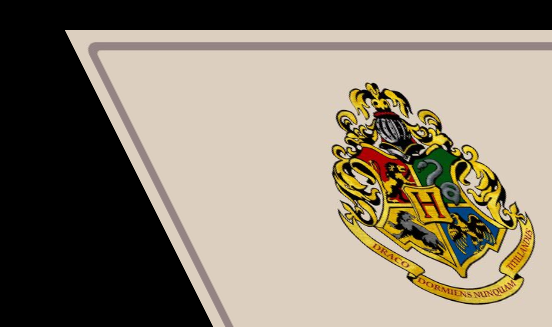

In [ ]:
# Scaling + Translation + Shearing
scale = 0.75
tx = 50
ty = 30
shear_factor_x = 0.5

h, w = image.shape[:2]
new_w = int(w * scale)
new_h = int(h * scale)
scaled_image = cv2.resize(image, (new_w, new_h))

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image_after_scaling = cv2.warpAffine(scaled_image, translation_matrix, (new_w, new_h))

shear_matrix_x = np.float32([[1, shear_factor_x, 0], [0, 1, 0]])
sheared_image_after_translation_scaling = cv2.warpAffine(translated_image_after_scaling, shear_matrix_x, (new_w, new_h))

print("Scaling -> Translation -> Shearing:")
cv2_imshow(sheared_image_after_translation_scaling)

Shearing -> Reflection -> Scaling:


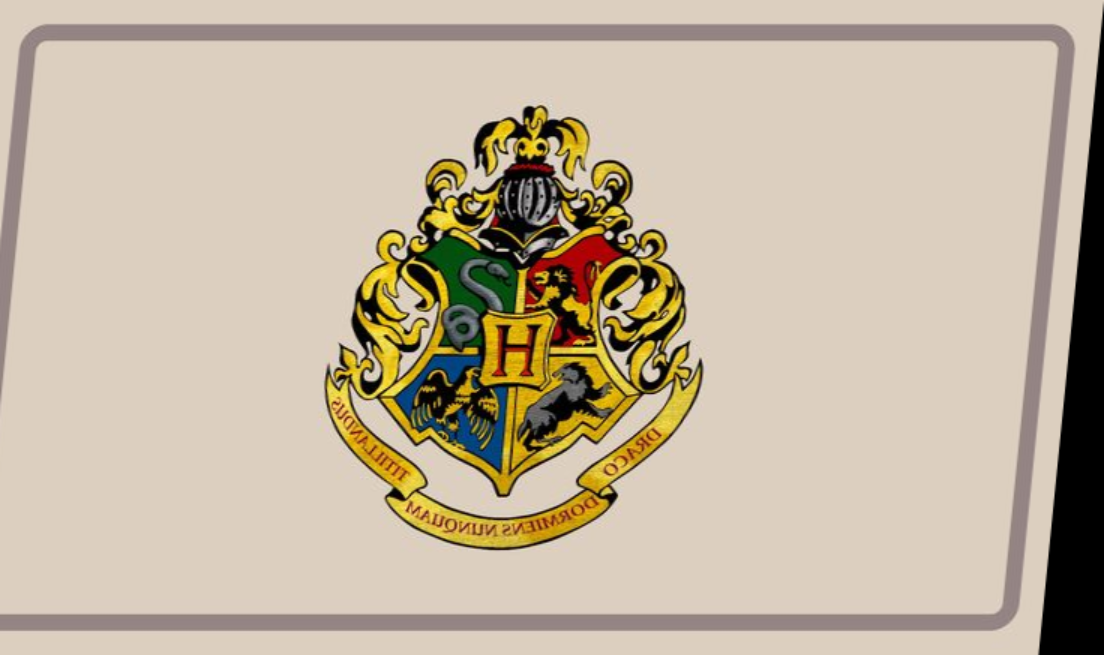

In [ ]:
# Shearing + Reflection + Scaling
shear_factor_y = 0.8
reflection_axis = 1
scale = 1.5

h, w = image.shape[:2]
shear_matrix_x = np.float32([[1, shear_factor_x, 0], [0, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix_x, (w, h))

reflected_image_after_shearing = cv2.flip(sheared_image, reflection_axis)

new_w = int(w * scale)
new_h = int(h * scale)
scaled_image_after_reflection_shearing = cv2.resize(reflected_image_after_shearing, (new_w, new_h))

print("Shearing -> Reflection -> Scaling:")
cv2_imshow(scaled_image_after_reflection_shearing)

#### (Rotation -> Translation) & (Translation -> Rotation)

Rotation -> Translation:


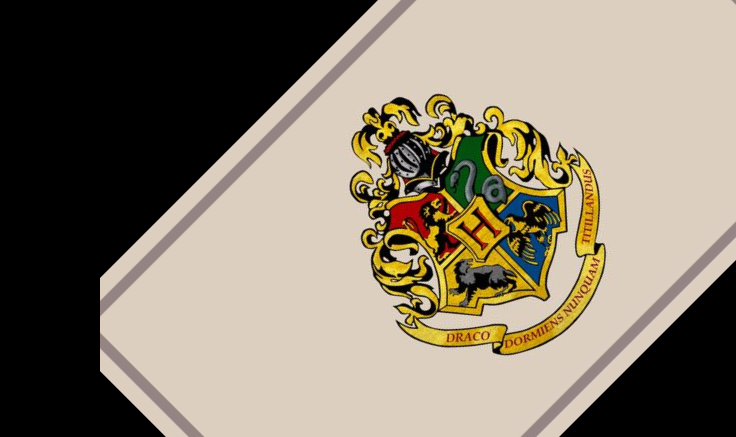


Translation -> Rotation:


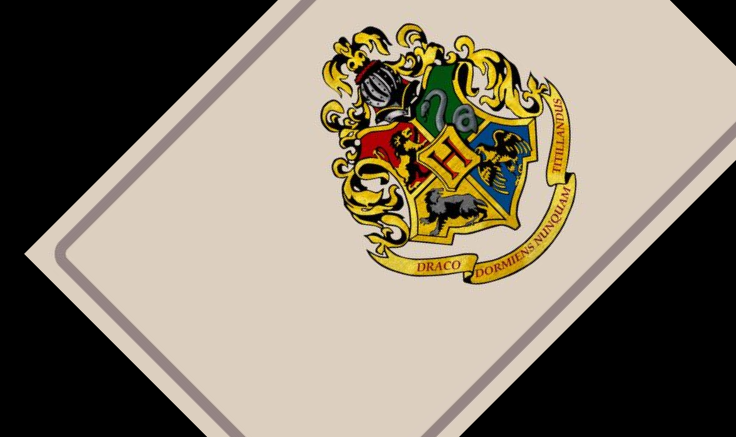

In [ ]:
angle = 45
tx = 100
ty = 0
scale = 1

(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image_after_rotation = cv2.warpAffine(rotated_image, translation_matrix, (w, h))

print("Rotation -> Translation:")
cv2_imshow(translated_image_after_rotation)
print()

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (w, h))

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image_after_translation = cv2.warpAffine(translated_image, rotation_matrix, (w, h))

print("Translation -> Rotation:")
cv2_imshow(rotated_image_after_translation)